# Confronto segnale osservato vs simulazione

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_lockin_perfetto = "../../PARTE 4: ODMR/data/cristallo2_n_lorentzians/odmr_dist_17_lorentz.csv"
file_simulazioni = "../data_to_180/spettro_simulato_norm.txt"

In [3]:
lockin = np.loadtxt(file_lockin_perfetto, skiprows=2, delimiter='|')
sim = np.loadtxt(file_simulazioni)

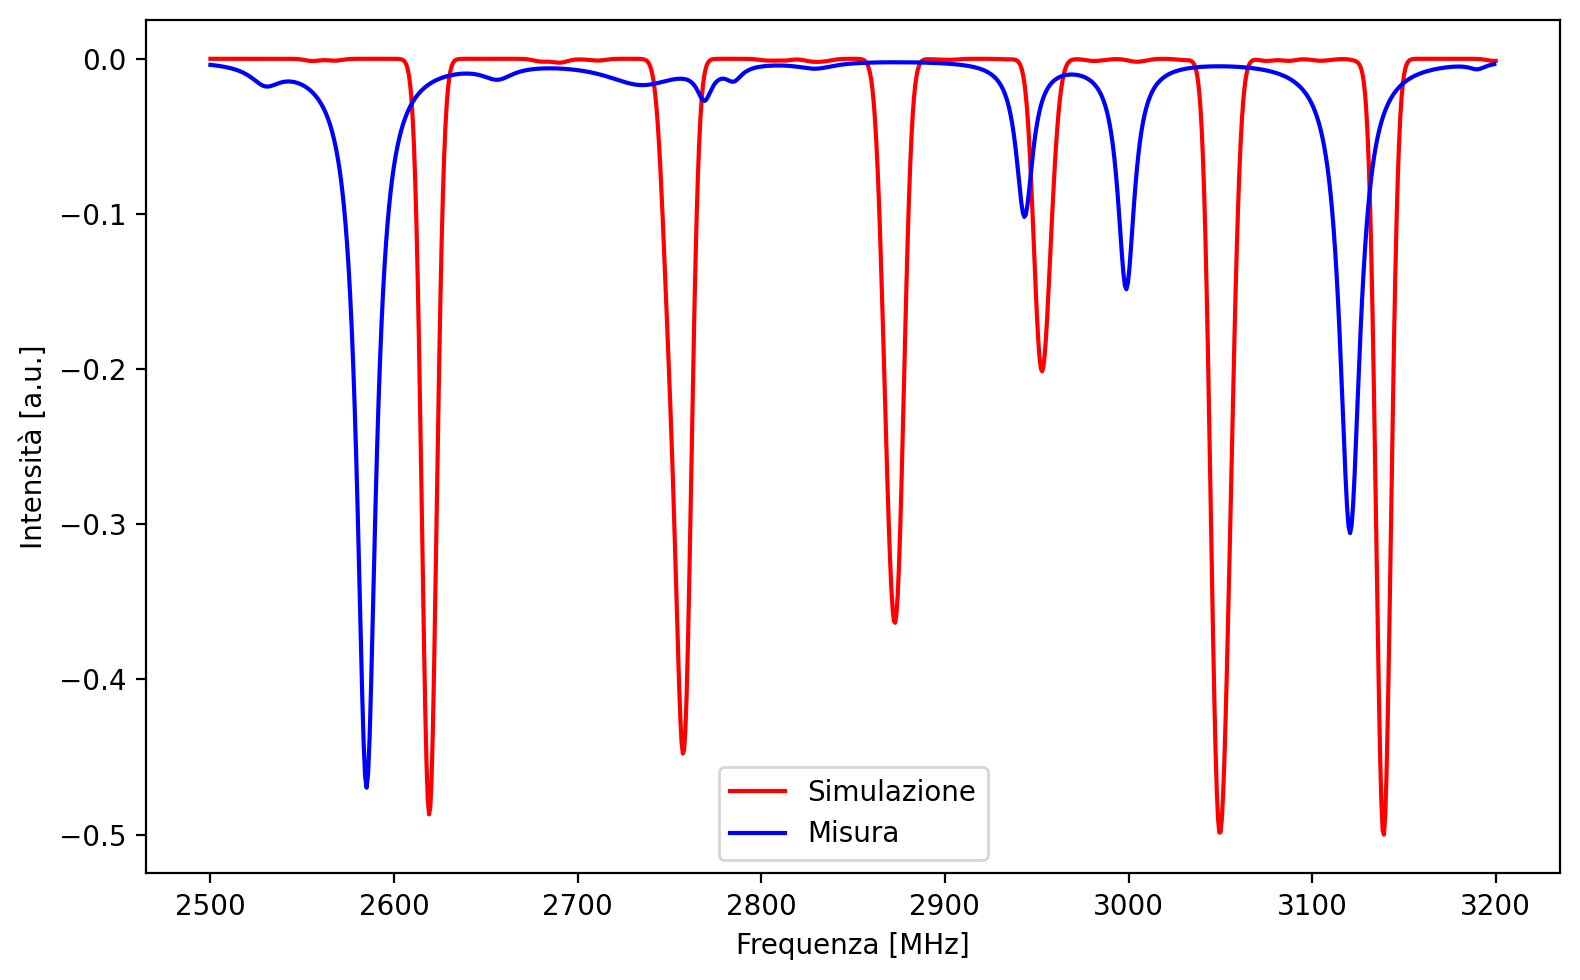

In [4]:
plt.figure(figsize=(8,5), dpi=200)
plt.plot(sim[:,0]*1000, sim[:,1]/2, label="Simulazione", color='red')
plt.plot(lockin[:,0], lockin[:,1], label="Misura", color='blue')
plt.xlabel('Frequenza [MHz]')
plt.ylabel('Intensità [a.u.]')
plt.legend()
plt.tight_layout()
plt.show()

# Altri angoli: $\alpha=10, \beta=62, \gamma=49$

In [5]:
dist = [39, 33, 30, 24, 22, 20, 19, 17]
campi = ['1.470000', '2.050000', '3.860000', '5.010000', '5.580000', '7.610000', '8.330000']

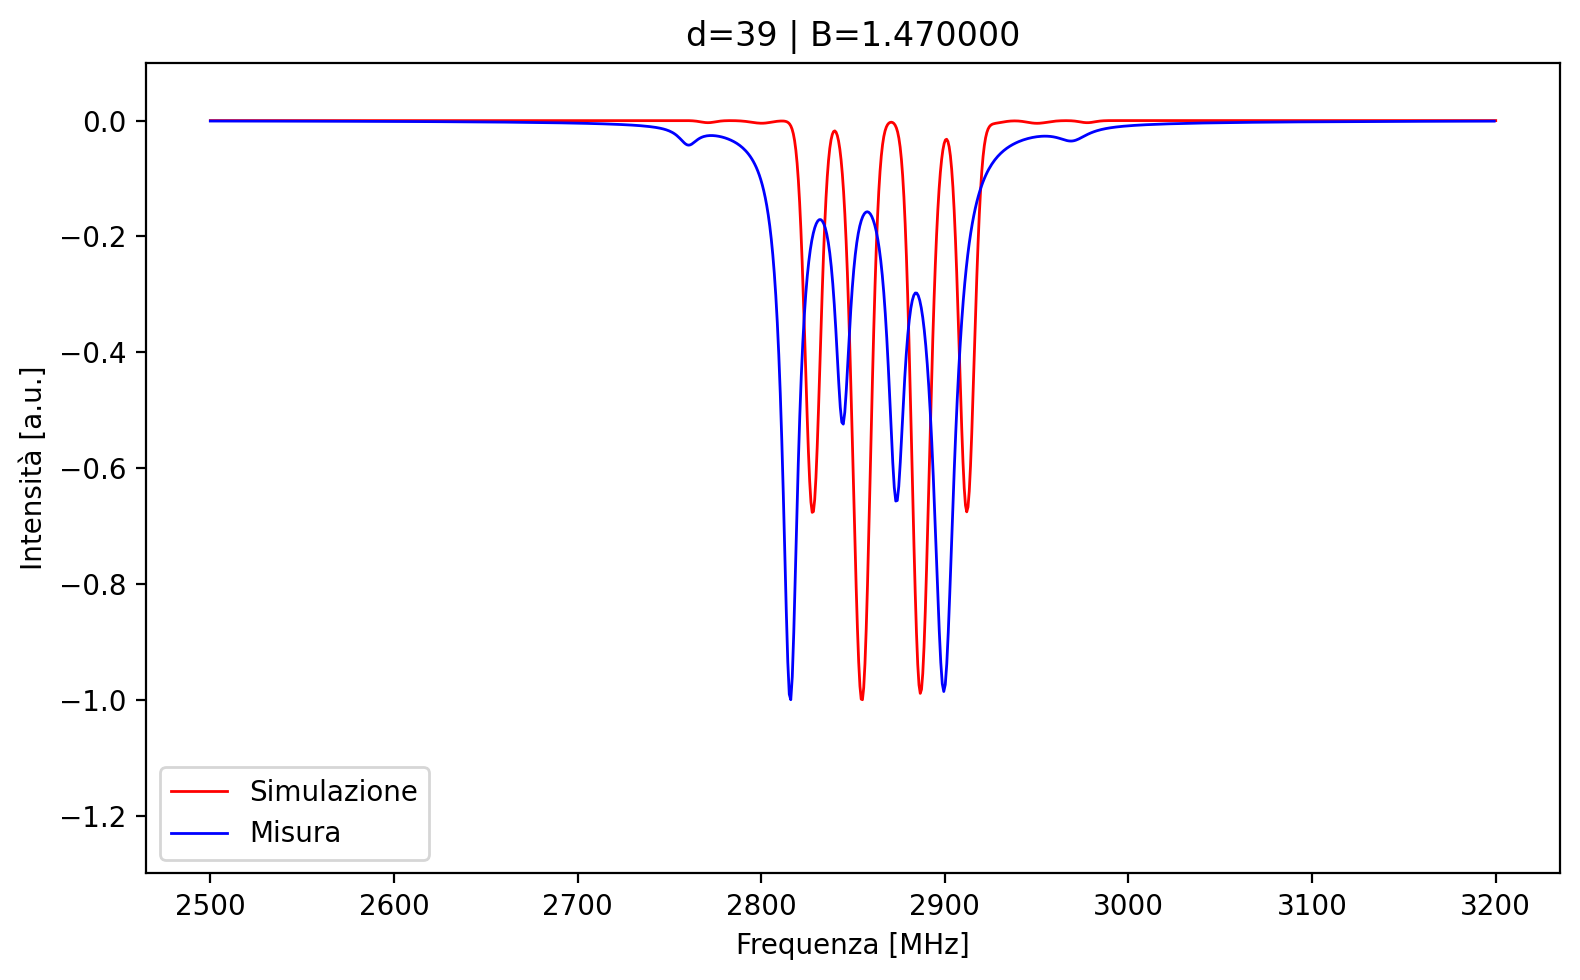

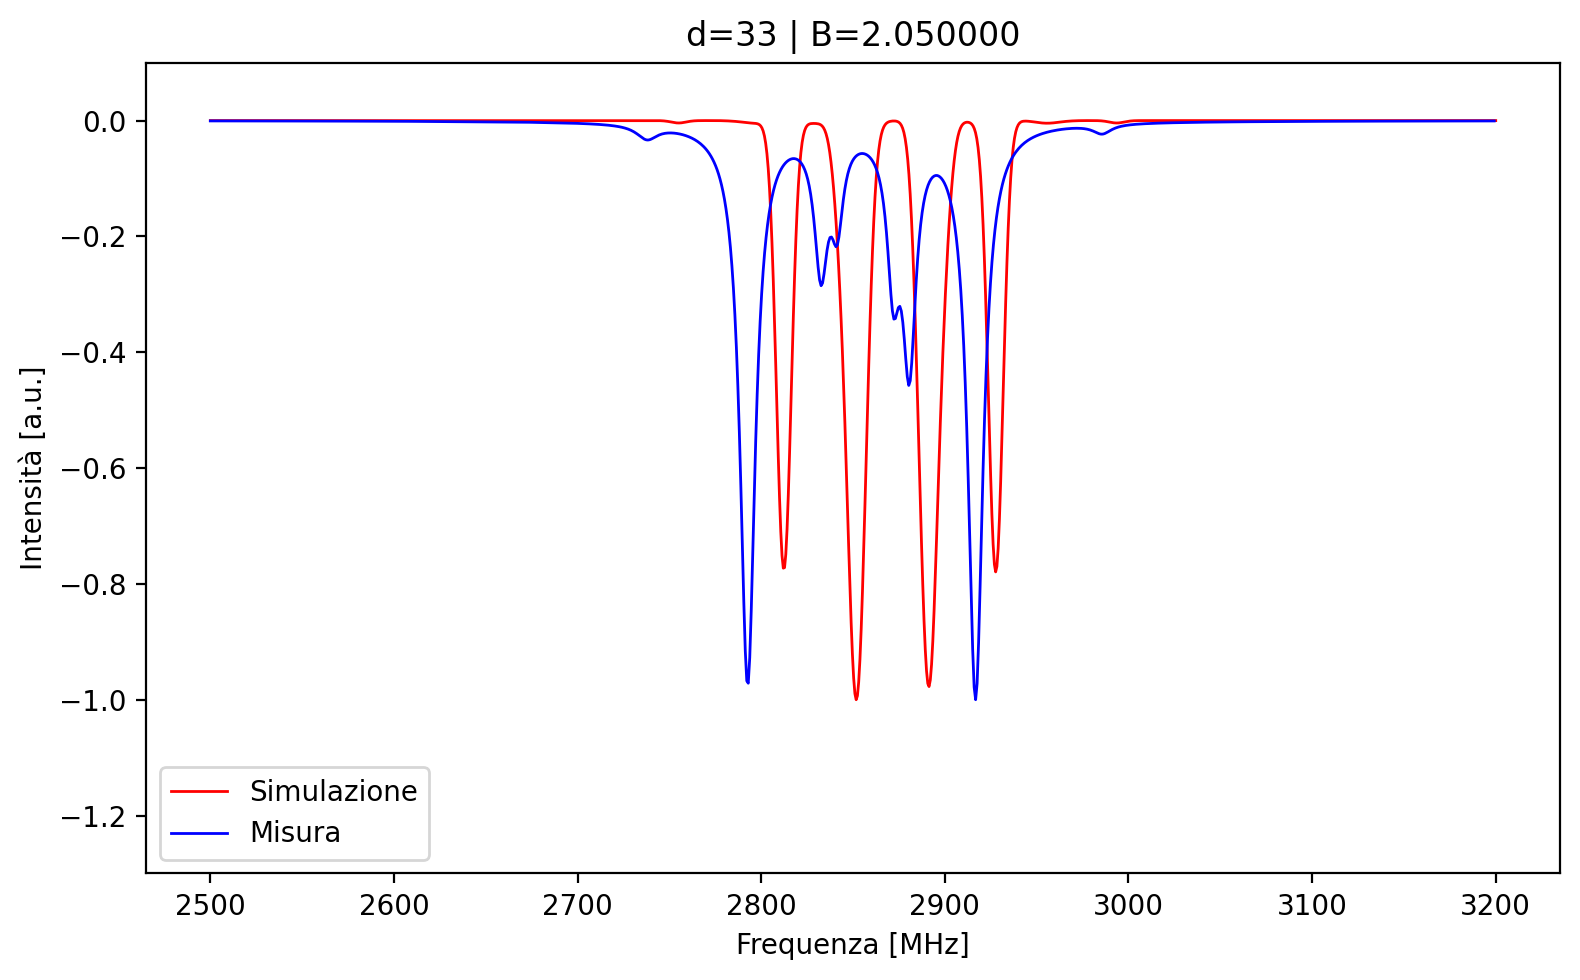

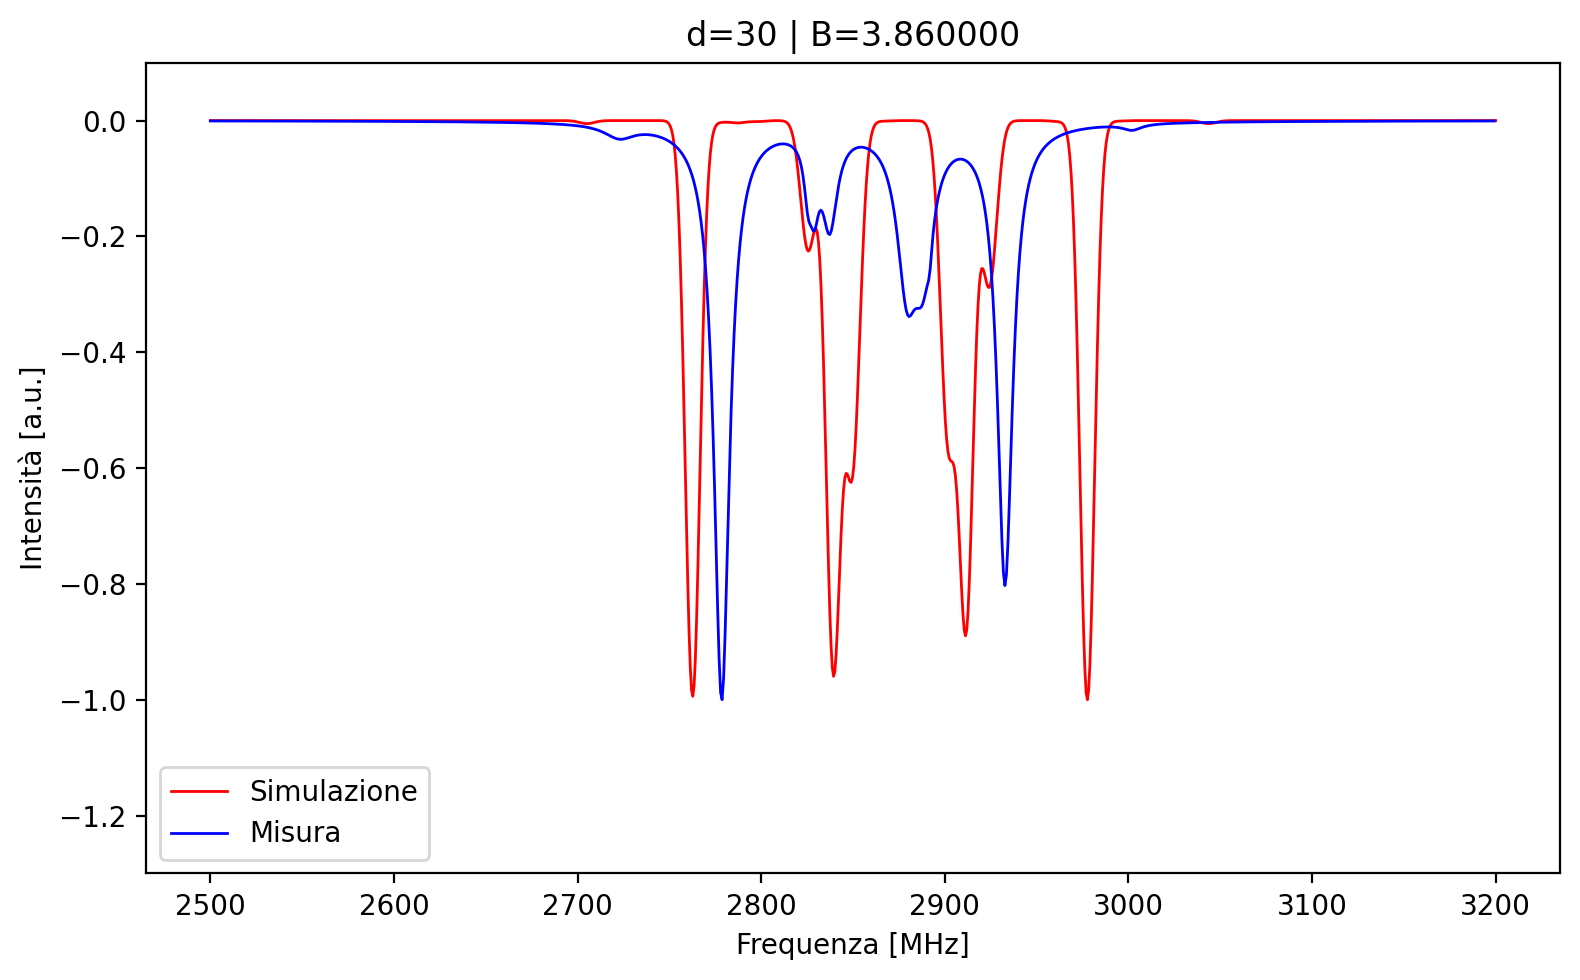

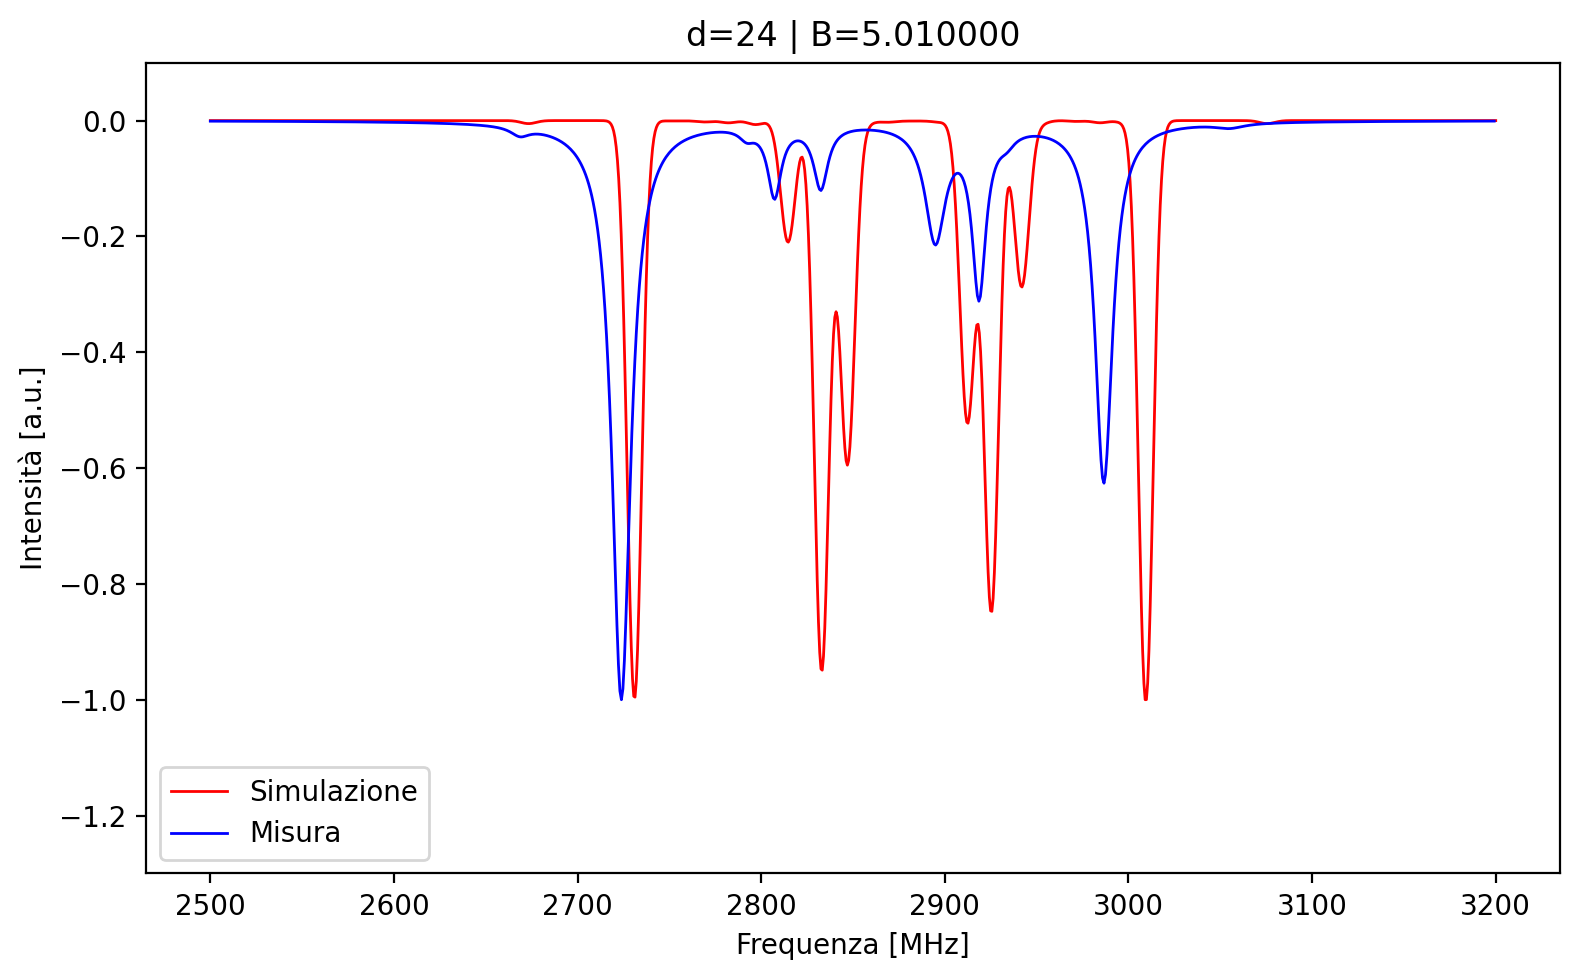

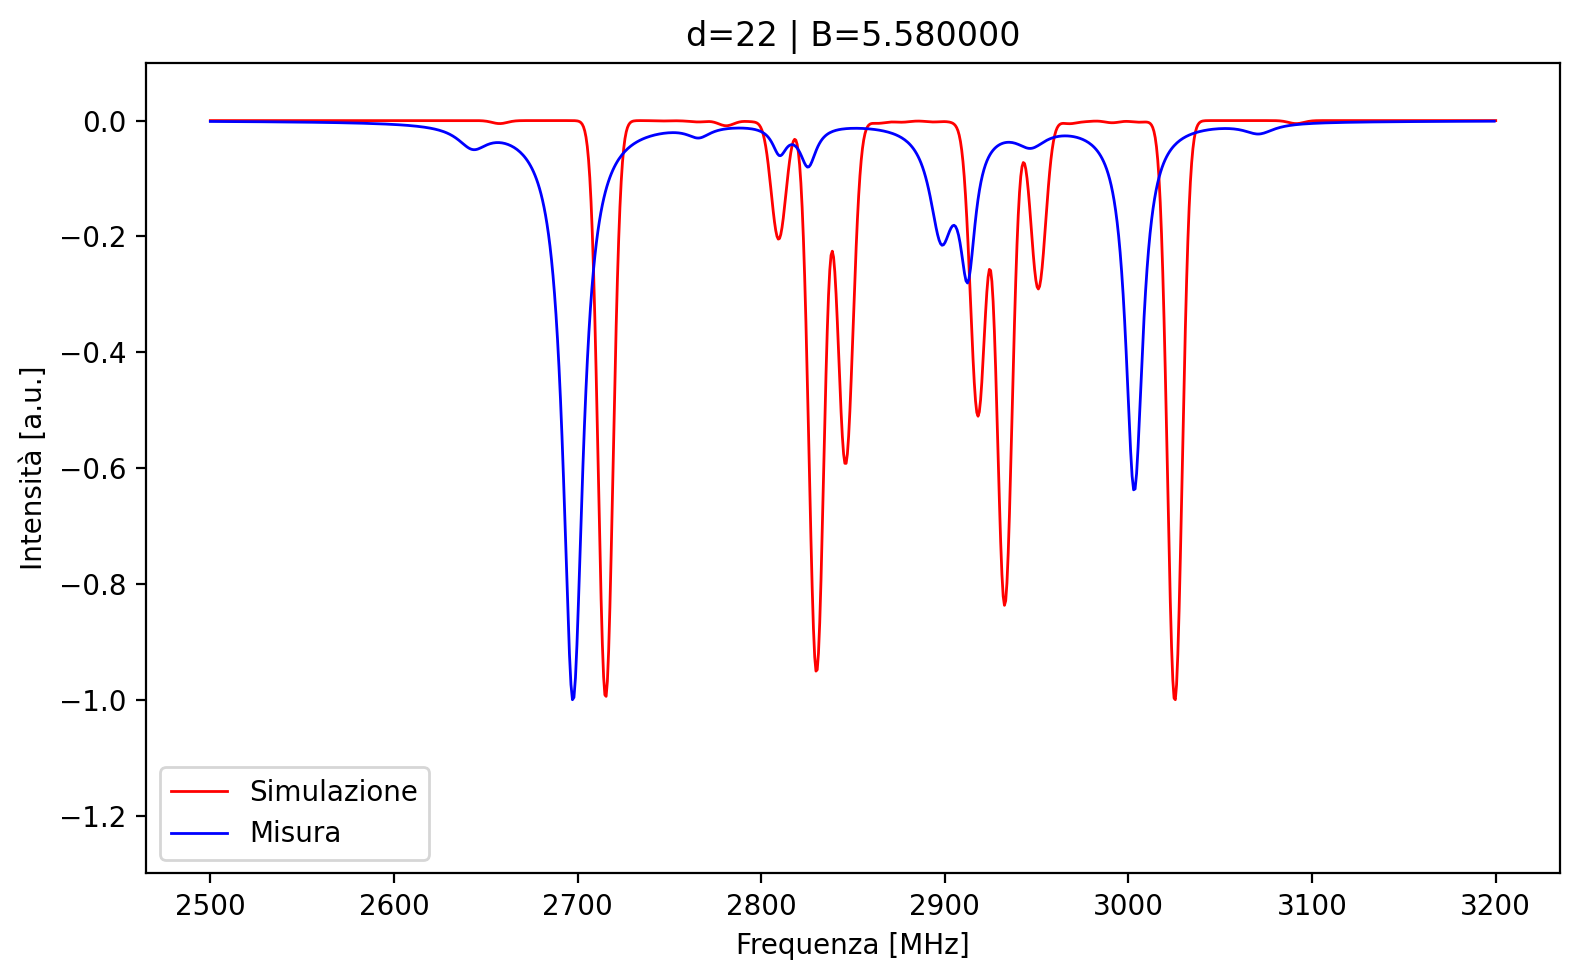

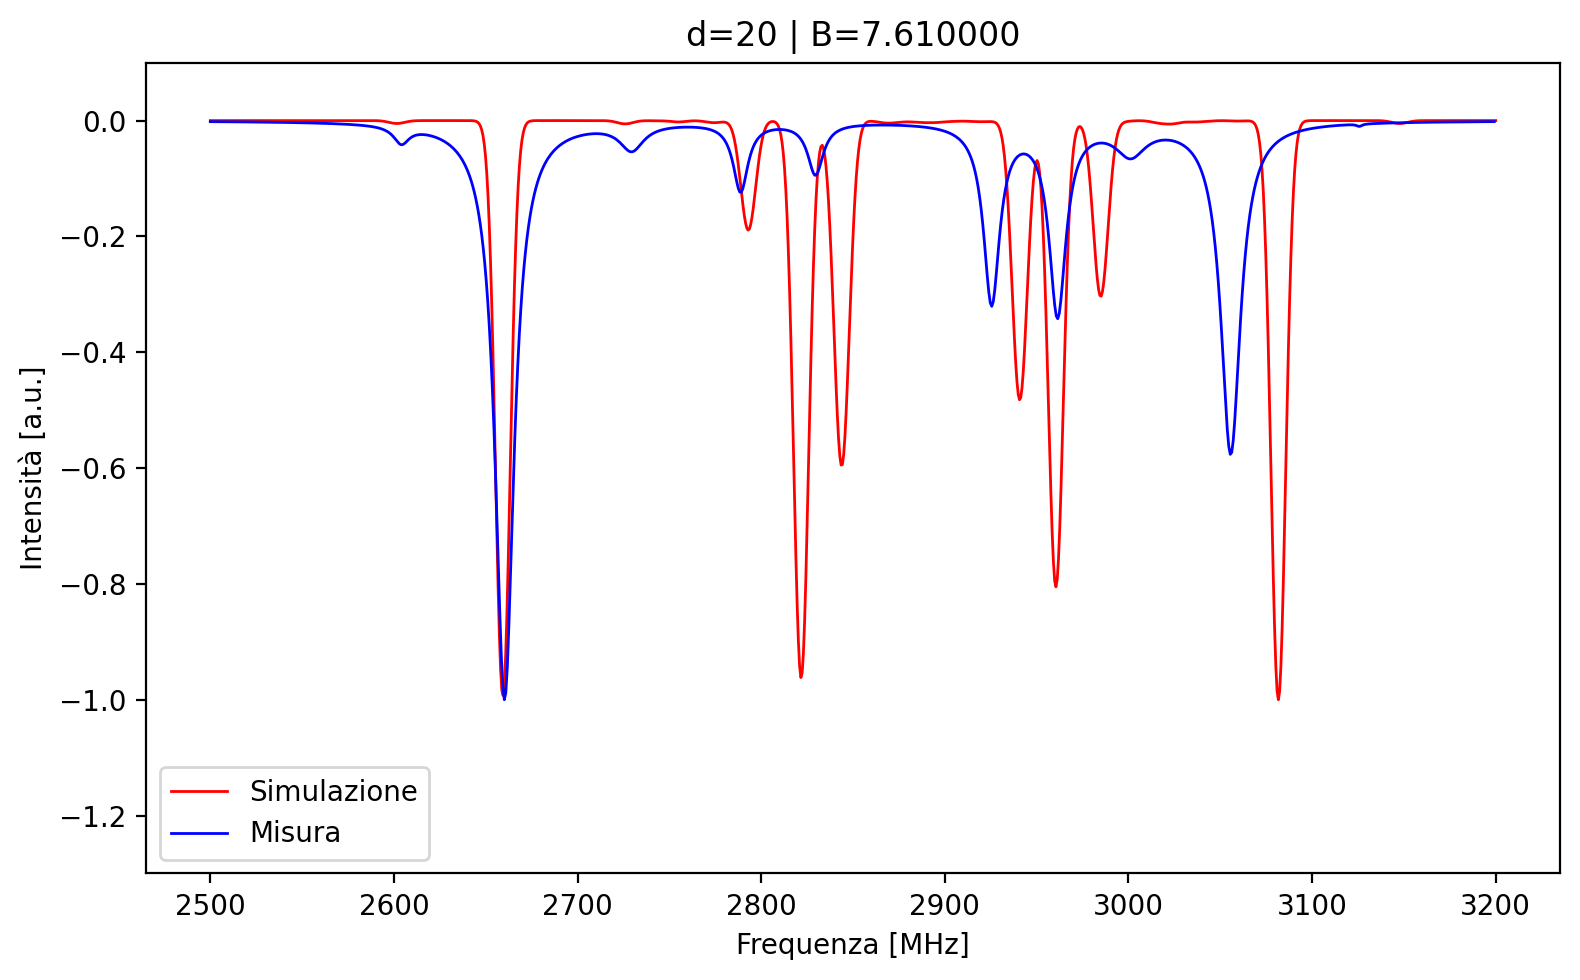

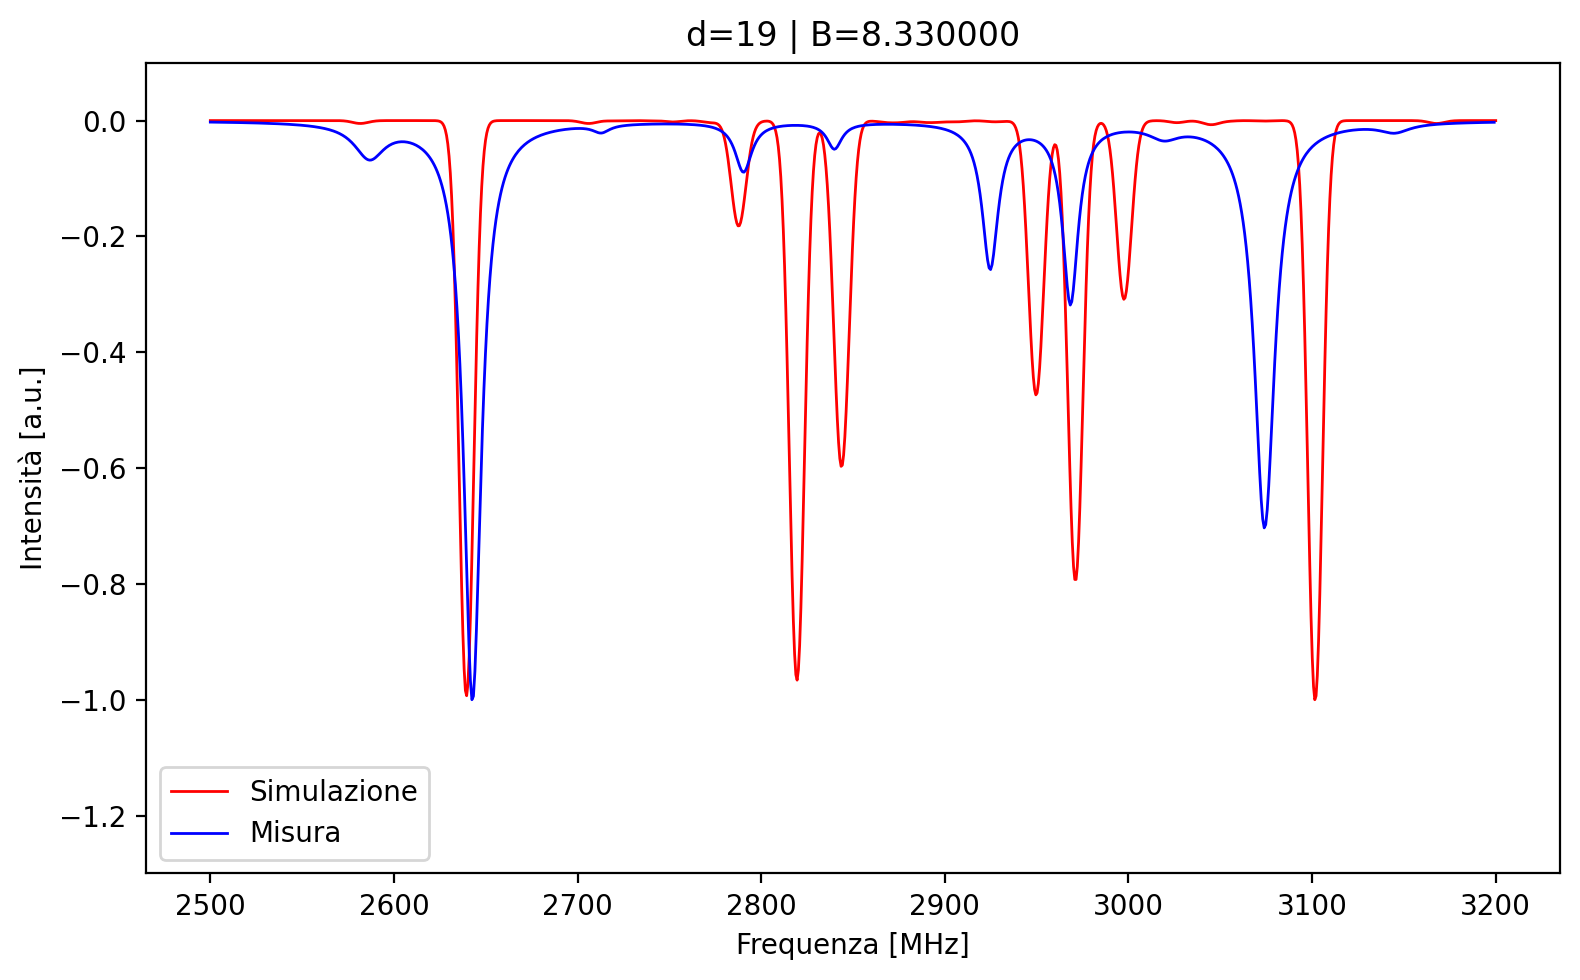

In [6]:
for d, B in zip(dist, campi):
    # nome file
    file_lockin_perfetto2 = f"../../PARTE 4: ODMR/data/cristallo2_n_lorentzians/odmr_dist_{d}_lorentz.csv"
    file_simulazioni2 = f"../spettri-simulati/a10-b62-g49-B{B}.csv"
    # lettura
    lockin2 = np.loadtxt(file_lockin_perfetto2, skiprows=2, delimiter='|')
    sim2 = np.loadtxt(file_simulazioni2, delimiter=',')
    # riscalo in modo che siano alti uguali:
    max_lockin2 = np.max(np.abs(lockin2[:,1]))
    max_sim2 = np.max(np.abs(sim2[:,1]))
    lockin2[:,1] = lockin2[:,1] / max_lockin2
    sim2[:,1] = sim2[:,1] / max_sim2
    # plot
    plt.figure(figsize=(8,5), dpi=200)
    plt.plot(sim2[:,0]*1000, sim2[:,1], label="Simulazione", color='red', linewidth=1)
    plt.plot(lockin2[:,0], lockin2[:,1], label="Misura", color='blue', linewidth=1)
    plt.title(f'd={d} | B={B}')
    plt.xlabel('Frequenza [MHz]')
    plt.ylabel('Intensità [a.u.]')
    plt.ylim(-1.3, 0.1)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Considerazioni sulla divergenza di $B_{sim}$ e $B_{mis}$

In [7]:
B_mis = np.array([np.float64(0.0),
 np.float64(0.00134735),
 np.float64(0.00147035),
 np.float64(0.00255966),
 np.float64(0.00345788),
 np.float64(0.00671791),
 np.float64(0.00857636),
 np.float64(0.01110222),
 np.float64(0.01270503),
 np.float64(0.01685433)]) * 1000 # in mT

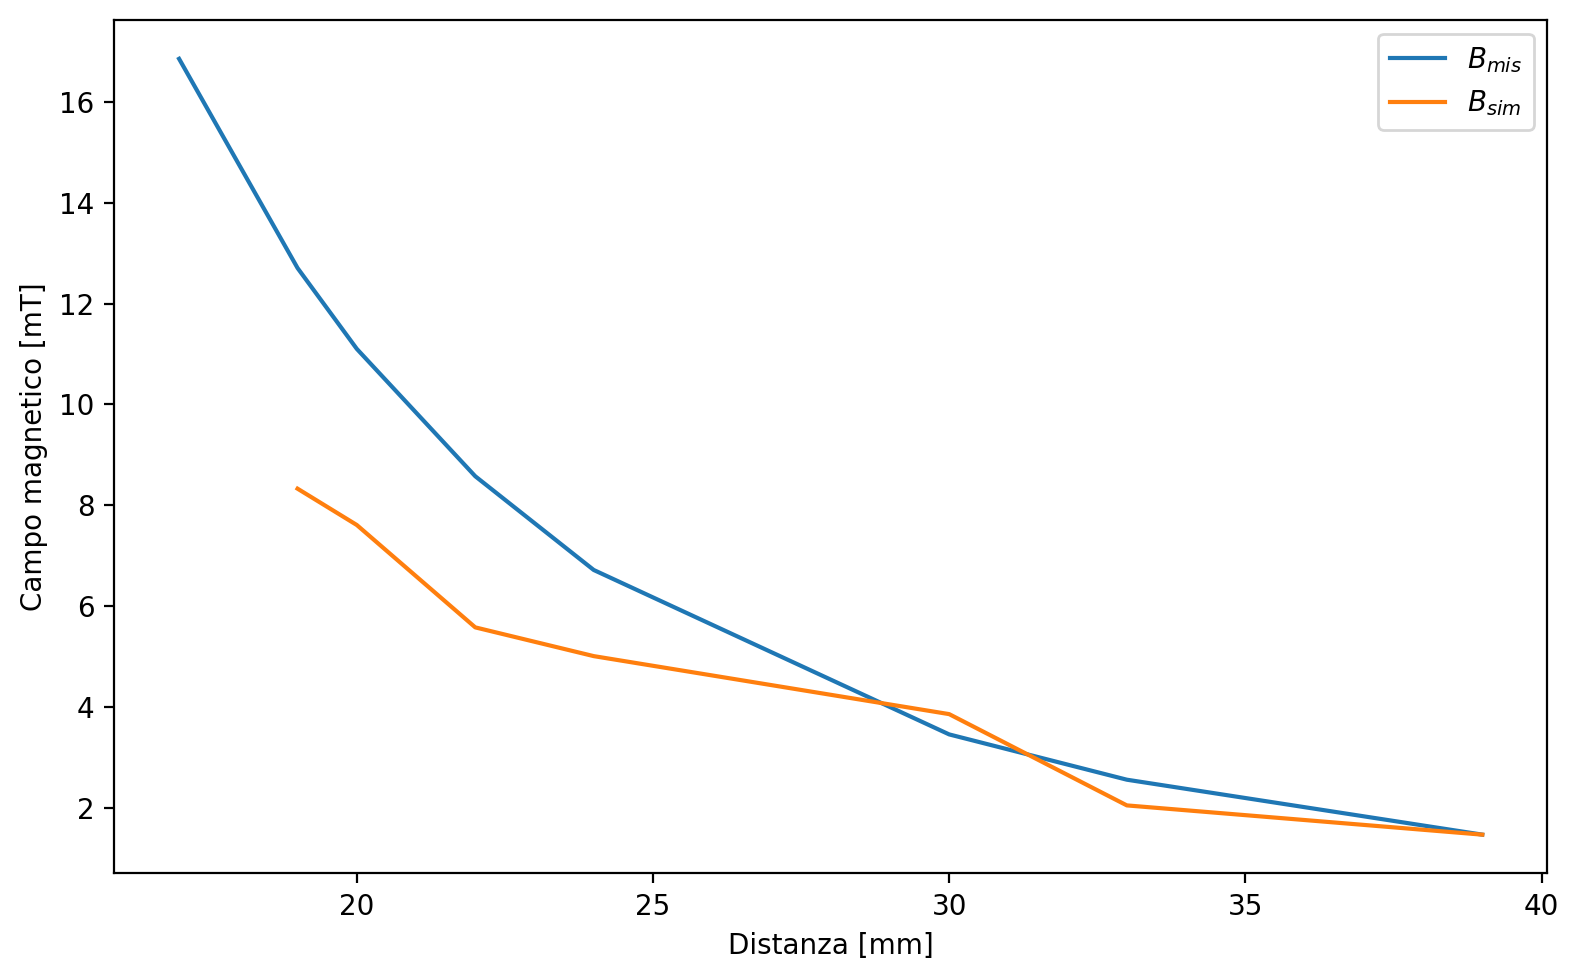

In [8]:
plt.figure(figsize=(8,5), dpi=200)
B_sim = np.array([float(B) for B in campi])
plt.plot(dist, B_mis[2:], label=r"$B_{mis}$")
plt.plot(dist[:-1], B_sim, label=r"$B_{sim}$")
plt.xlabel('Distanza [mm]')
plt.ylabel('Campo magnetico [mT]')
plt.legend()
plt.tight_layout()
plt.show()